# Stroke Prediction

## Introduction

Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to
the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen
and nutrients for its correct functioning. The other way around, the brain is not able to drain and
expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is
in a critical condition as brain cells will imminently begin to die.
The American Stroke Association indicates that stroke is the fifth cause of death and disability in
the United States. For this reason, stroke is considered a severe disease and has been the
subject of extensive research, not only in the medical field but also in data science and machine
learning studies.

## Dataset Description 

The dataset used in this article contains 5110 records of patients. Each patient has 12 columns
each referring to a concrete attribute. Most of these attributes correspond to medical records or
the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average
glucose levels in the blood, and body mass index (BMI). As we can observe from these first
attributes, the dataset provides relevant data regarding the likelihood of patients suffering from
stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has
suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact,
stroke is also an attribute in the dataset and indicates in each medical record if the patient
suffered from a stroke disease or not.

## Data Dictionary -
1. Id - Unique Id
2. gender
3. age
4. hypertension - Binary Feature
5. Heart_disease - Binary Feature
6. Ever_married - Has the patient ever been married
7. Work_type - Work type of a patient
8. Residency_type - Residency type of patient
9. avg_glucose_level - Average Glucose level in the blood
10. bmi - Body mass Index
11. smoking_status - Smoking status of the patient
12. stroke - stroke event

### Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize']=[15,7]

### Read the dataset 

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
df.shape

(5110, 12)

### Checking for the missing values.


In [4]:
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### Investigate and predict the missing BMI Value.

In [5]:
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [6]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

### Checking the datatype, number of non null values and name of each variable in the dataset.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Check the descriptive statistics of the dataset.


In [8]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### Visualizing the proportion of Stroke samples in the dataset.


In [9]:
df['stroke'].value_counts(dropna=False)

0    4861
1     249
Name: stroke, dtype: int64

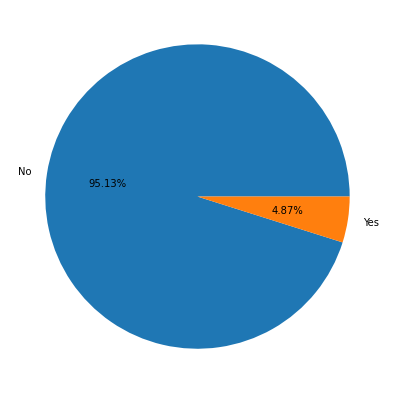

In [10]:
plt.pie(df.groupby('stroke')['stroke'].count(),autopct='%2.2f%%',labels=['No','Yes'])
plt.show()

### Visualizing the Distribution of Male and Female Ages.


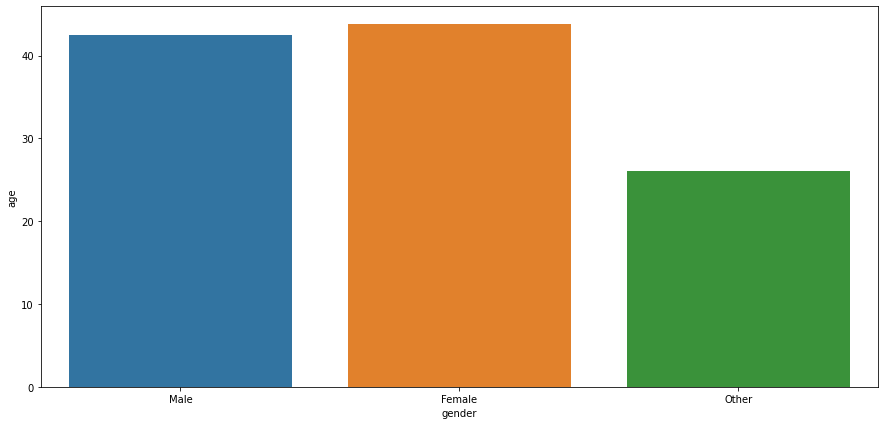

In [11]:
sns.barplot(data=df,x='gender',y='age',ci=None)
plt.show()

#### Inferences:

* There are Females 

### Visualize the stroke sample based on 

a) BMI and Glucose Level

b) BMI and Age



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


[]

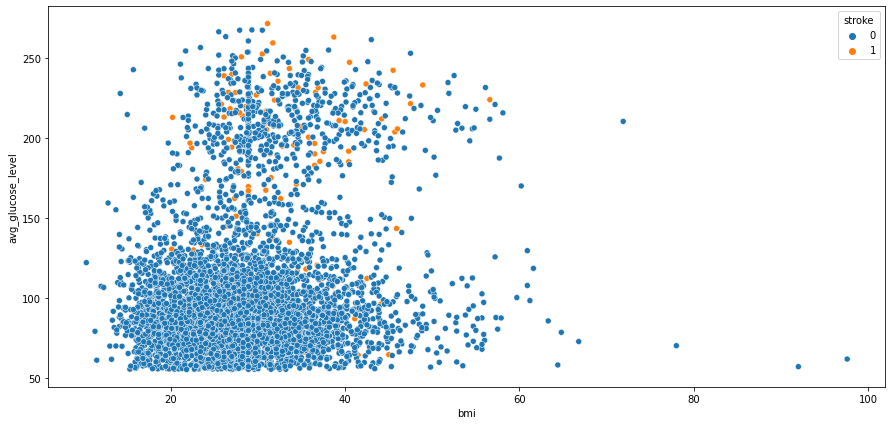

In [14]:
sns.scatterplot(data=df,x='bmi',y='avg_glucose_level',hue='stroke')
plt.plot()

[]

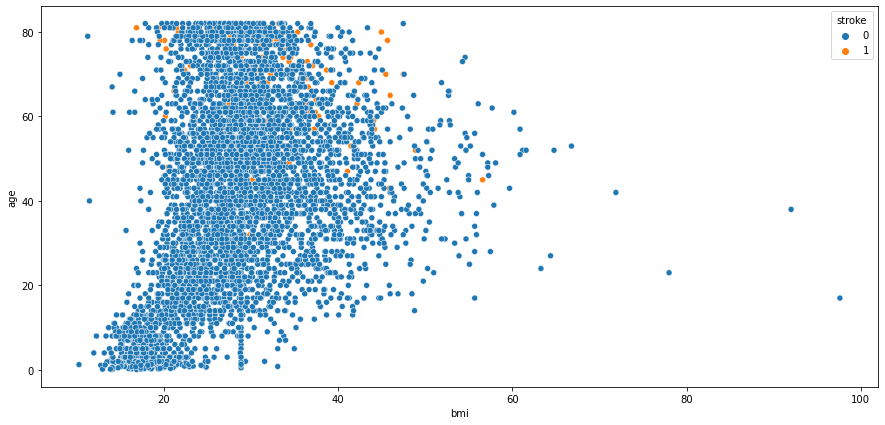

In [15]:
sns.scatterplot(data=df,x='bmi',y='age',hue='stroke')
plt.plot()

### Using the pie chart visualizes the proportion of different smoking categories among the stroke population.


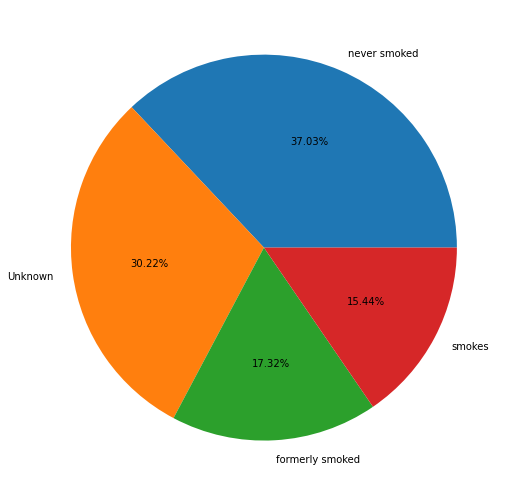

In [16]:
df['smoking_status'].value_counts().plot(kind='pie',autopct='%2.2f%%')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Perform hypothesis testing to find the significant variables.


### Drop the unnecessary columns.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [18]:
df=df.drop('id',axis=1)

* **Dropped 'id' variable since it has unique values and it is not needed for further analysis.**

### Replacing following categories columns in integer format as follow –

a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)

b) ever_married('Yes': 1, 'No': 0)

c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)



In [19]:
df['work_type']= df['work_type'].map({'Private':0,'Self-employed':1,'Govt_job':2,'children':1,'Never_worked':-2})

In [20]:
df['ever_married']=df['ever_married'].map({'Yes':1,'No':0})

In [21]:
df['smoking_status']= df['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})

### Checking the distribution of 'bmi' and 'stroke' columns in the dataset.


In [22]:
df.loc[df['stroke']==0,'bmi'].skew()

1.0862387767084203

Skewness of BMI of class 0 is 1.0862387767084203
Skewness of BMI of class 1 is 1.0876781596028835


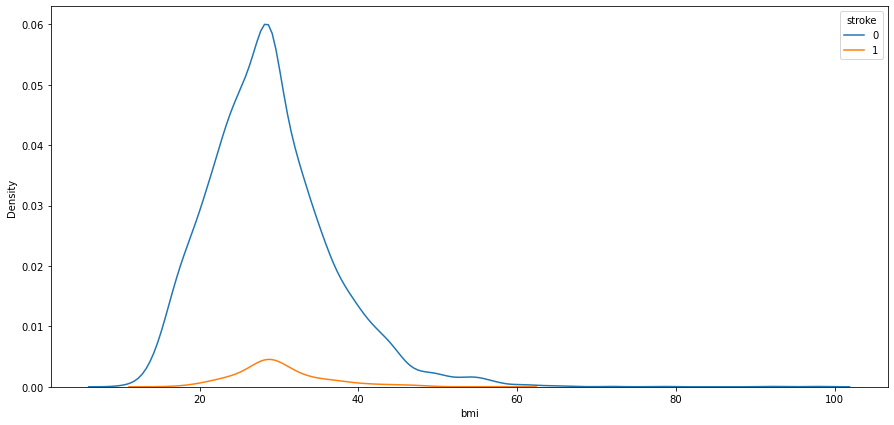

In [23]:
sns.kdeplot(data=df,x='bmi',hue='stroke')
print(f"Skewness of BMI of class 0 is {df.loc[df['stroke']==0,'bmi'].skew()}")
print(f"Skewness of BMI of class 1 is {df.loc[df['stroke']==1,'bmi'].skew()}")
plt.show()

### Columns that are highly skewed.

In [24]:
for i in df.select_dtypes(include=np.number).columns:
    s=df[i].skew()
    print('Skewness of ',i,'is',s)

Skewness of  age is -0.1370593225984694
Skewness of  hypertension is 2.7153916581245294
Skewness of  heart_disease is 3.947243966661894
Skewness of  ever_married is -0.6577452831973872
Skewness of  work_type is 0.6795855528601694
Skewness of  avg_glucose_level is 1.5722838665030459
Skewness of  bmi is 1.0767160713842094
Skewness of  smoking_status is 0.0822793620614842
Skewness of  stroke is 4.193284486071313


* **The Highly skewed are Hypertension,Stroke and Heartdisease.**

### Columns that are highly kurtosis.


In [25]:
for i in df.select_dtypes(include=np.number).columns:
    k=df[i].kurt()
    print('Skewness of ',i,'is',k)

Skewness of  age is -0.9910102432016696
Skewness of  hypertension is 5.375455600474597
Skewness of  heart_disease is 13.586052216807259
Skewness of  ever_married is -1.56798498844906
Skewness of  work_type is -0.08543235147581063
Skewness of  avg_glucose_level is 1.6804785404038278
Skewness of  bmi is 3.6230613267307876
Skewness of  smoking_status is -0.9224150339628681
Skewness of  stroke is 15.58973628641584


* **The features that are highly kurtosis are hypertension, heart_disease, bmi, stroke.**

### Finding the distribution of all variables with respect to the outcome 'stroke' variable.

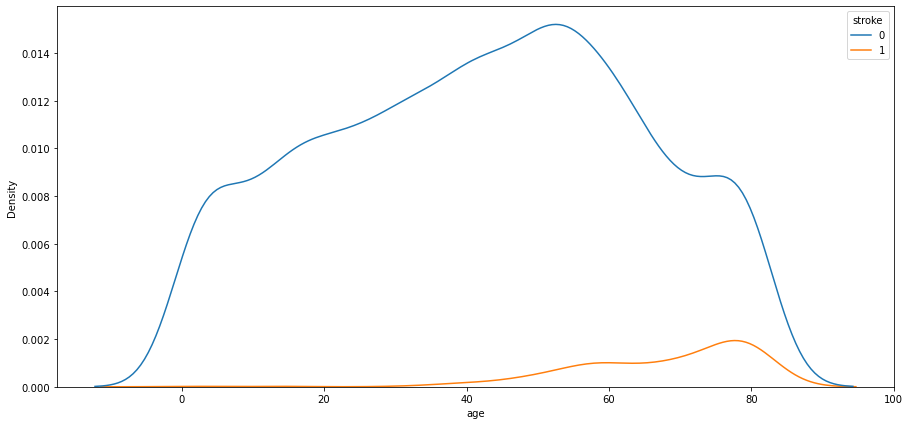

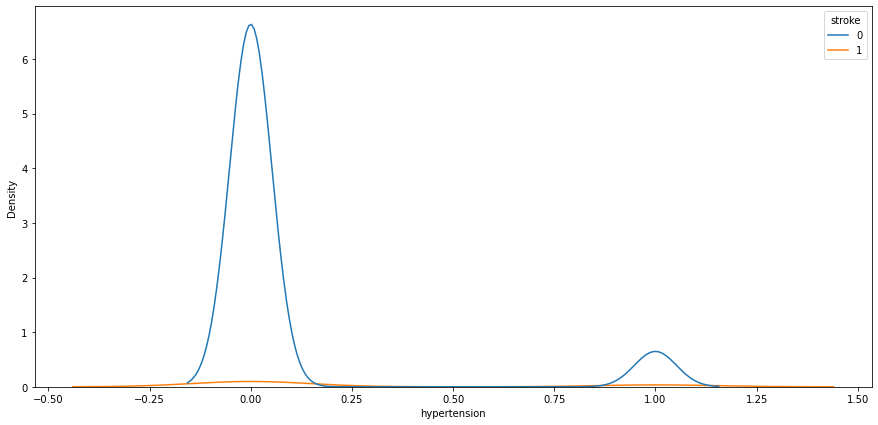

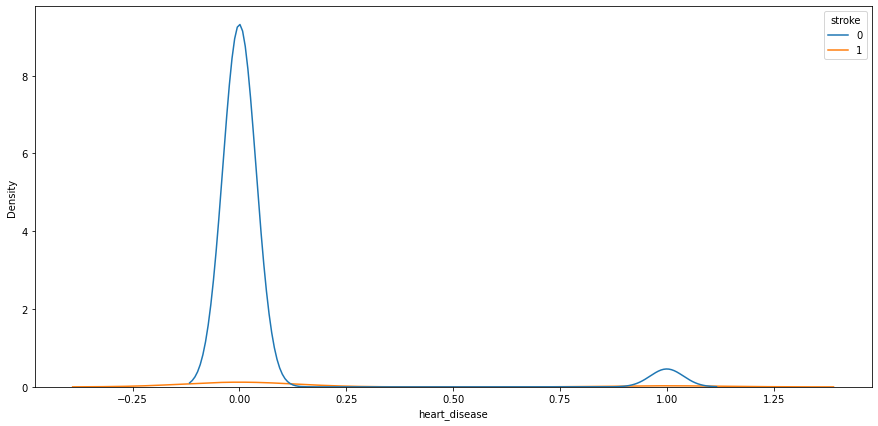

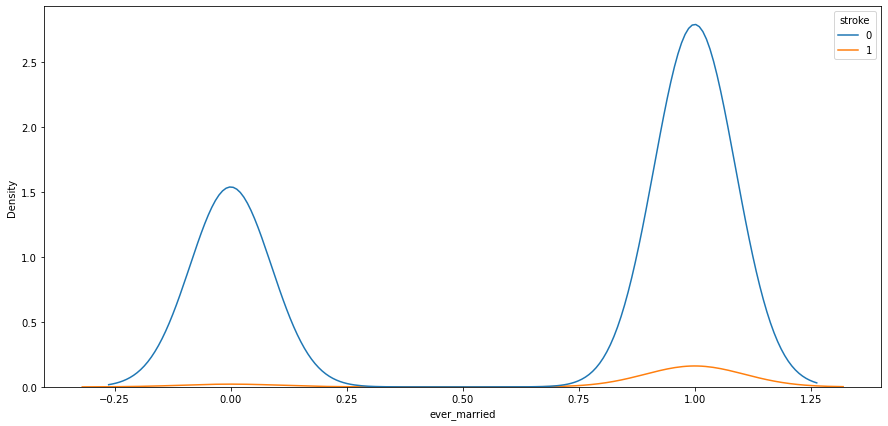

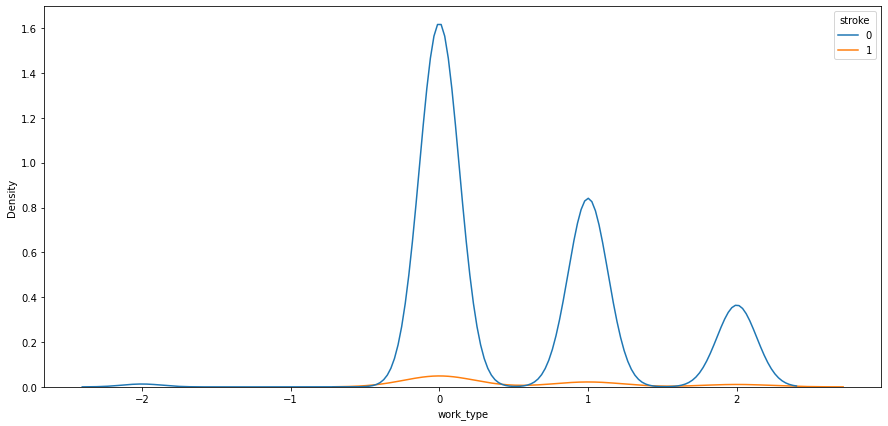

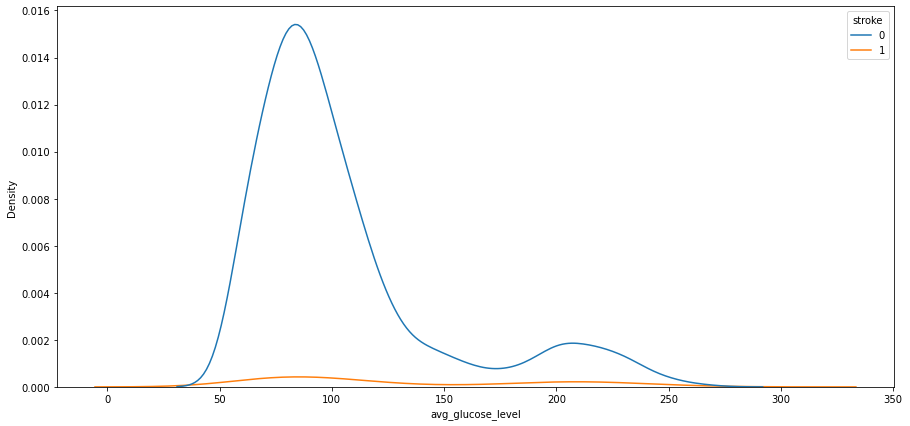

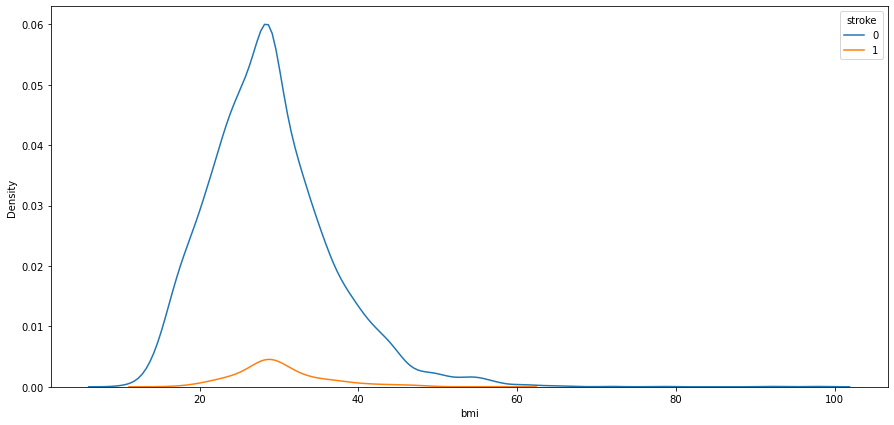

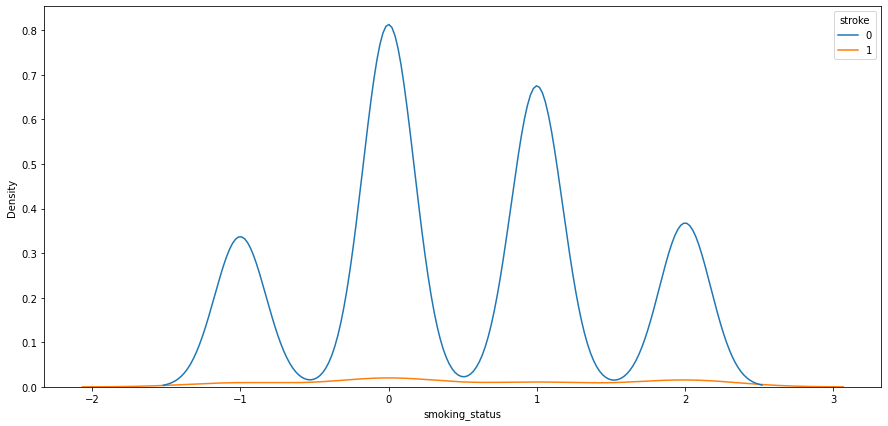

In [26]:
for i in df.select_dtypes(include=np.number).drop('stroke',1).columns:
    sns.kdeplot(data=df,x=i,hue='stroke')
    plt.show()

### Plotting the heatmap for correlation matrix for the given dataset. 

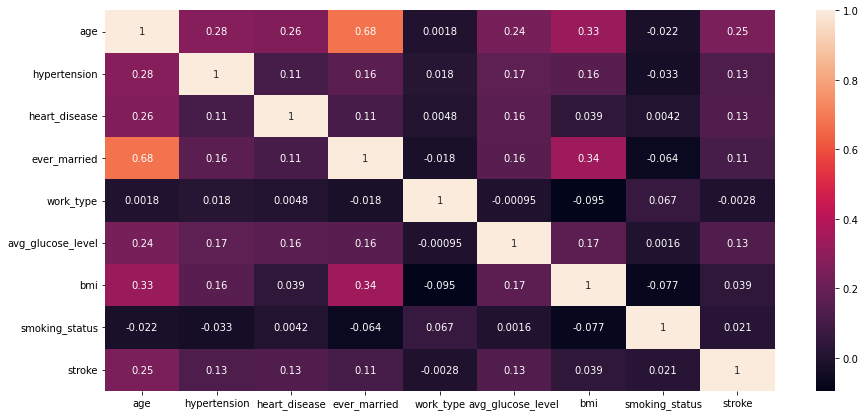

In [27]:
sns.heatmap(df.corr(),annot=True)
plt.show()

* **There are no highly correlated variables.**

#### Checking if the dataset is ready for model building.

In [28]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,0,Urban,228.69,36.600000,2,1
1,Female,61.0,0,0,1,1,Rural,202.21,28.893237,0,1
2,Male,80.0,0,1,1,0,Rural,105.92,32.500000,0,1
3,Female,49.0,0,0,1,0,Urban,171.23,34.400000,-1,1
4,Female,79.0,1,0,1,1,Rural,174.12,24.000000,0,1


* Still we have to encode the gender and Residence_type we have to encoding. 

In [29]:
df=pd.get_dummies(df,drop_first=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   5110 non-null   float64
 1   hypertension          5110 non-null   int64  
 2   heart_disease         5110 non-null   int64  
 3   ever_married          5110 non-null   int64  
 4   work_type             5110 non-null   int64  
 5   avg_glucose_level     5110 non-null   float64
 6   bmi                   5110 non-null   float64
 7   smoking_status        5110 non-null   int64  
 8   stroke                5110 non-null   int64  
 9   gender_Male           5110 non-null   uint8  
 10  gender_Other          5110 non-null   uint8  
 11  Residence_type_Urban  5110 non-null   uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 374.4 KB


### Splitting the dataset randomly into train and test dataset.

In [31]:
from sklearn.model_selection import train_test_split

x = df.drop('stroke',axis=1)
y = df.stroke

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [32]:
y.shape

(5110,)

### Checking the dataset is balanced or imbalanced. 

In [33]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE
print('Before SMOTE', Counter(y))
smote = SMOTE(sampling_strategy=0.5,random_state=42)
x_sm,y_sm = smote.fit_resample(x,y)
print('Before SMOTE', Counter(y_sm))

Before SMOTE Counter({0: 4861, 1: 249})
Before SMOTE Counter({0: 4861, 1: 2430})


#### Train Test Split after Over_sampling

In [37]:
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(x_sm,y_sm,test_size=0.3,random_state=0)

### Model Selection/hyperparameter tuning


#### Creating the Model Evaluation values dataframe

In [51]:
cols = ['Model','Accuracy_Score(Train)','Accuracy_Score(Test)','Cohen_Kappa','Log_loss']

In [52]:
mod = pd.DataFrame(columns=cols)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss


#### Logistic Regression:

In [44]:
from sklearn.linear_model import LogisticRegression

lr =LogisticRegression(random_state=0)
lr.fit(xtrain1,ytrain1)
ypred_lr = lr.predict(xtest1)

In [50]:
from sklearn.metrics import classification_report,cohen_kappa_score,log_loss
print('Accuracy Score of Train',lr.score(xtrain1,ytrain1))
print('Accuracy Score of Test',lr.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_lr))
print('Log Loss',log_loss(ytest1,ypred_lr))
print(classification_report(ytest1,ypred_lr))

Accuracy Score of Train 0.8159905937683716
Accuracy Score of Test 0.8053016453382084
Cohen Kappa Score 0.5546028311588026
Log Loss 6.724702869383229
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1436
           1       0.75      0.65      0.70       752

    accuracy                           0.81      2188
   macro avg       0.79      0.77      0.78      2188
weighted avg       0.80      0.81      0.80      2188



In [56]:
model_stats = pd.Series({'Model':'Logistic Regression', 'Accuracy_Score(Train)':lr.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':lr.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_lr),
                        'Log_loss':log_loss(ytest1,ypred_lr)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703


#### Decision Tree:

In [58]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

dt.fit(xtrain1,ytrain1)
ypred_dt = dt.predict(xtest1)

print('Accuracy Score of Train',dt.score(xtrain1,ytrain1))
print('Accuracy Score of Test',dt.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_dt))
print('Log Loss',log_loss(ytest1,ypred_dt))
print(classification_report(ytest1,ypred_dt))

Accuracy Score of Train 1.0
Accuracy Score of Test 0.876599634369287
Cohen Kappa Score 0.7276750318072023
Log Loss 4.262149529004101
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1436
           1       0.81      0.83      0.82       752

    accuracy                           0.88      2188
   macro avg       0.86      0.87      0.86      2188
weighted avg       0.88      0.88      0.88      2188



In [59]:
model_stats = pd.Series({'Model':'Decision Tree', 'Accuracy_Score(Train)':dt.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':dt.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_dt),
                        'Log_loss':log_loss(ytest1,ypred_dt)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150


In [60]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=0)

rf.fit(xtrain1,ytrain1)
ypred_rf = rf.predict(xtest1)

print('Accuracy Score of Train',rf.score(xtrain1,ytrain1))
print('Accuracy Score of Test',rf.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_rf))
print('Log Loss',log_loss(ytest1,ypred_rf))
print(classification_report(ytest1,ypred_rf))

Accuracy Score of Train 1.0
Accuracy Score of Test 0.9227605118829981
Cohen Kappa Score 0.8274225676313938
Log Loss 2.6677837210945525
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1436
           1       0.90      0.87      0.89       752

    accuracy                           0.92      2188
   macro avg       0.92      0.91      0.91      2188
weighted avg       0.92      0.92      0.92      2188



In [61]:
model_stats = pd.Series({'Model':'Random Forest', 'Accuracy_Score(Train)':rf.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':rf.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_rf),
                        'Log_loss':log_loss(ytest1,ypred_rf)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784


#### KNN Model:

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(xtrain1,ytrain1)
ypred_knn= knn.predict(xtest1)

print('Accuracy Score of Train',knn.score(xtrain1,ytrain1))
print('Accuracy Score of Test',knn.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_knn))
print('Log Loss',log_loss(ytest1,ypred_knn))
print(classification_report(ytest1,ypred_knn))

Accuracy Score of Train 0.9108367626886146
Accuracy Score of Test 0.8711151736745887
Cohen Kappa Score 0.7293941392763914
Log Loss 4.451607884449876
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1436
           1       0.75      0.93      0.83       752

    accuracy                           0.87      2188
   macro avg       0.86      0.89      0.86      2188
weighted avg       0.89      0.87      0.87      2188



In [64]:
model_stats = pd.Series({'Model':'KNN Model', 'Accuracy_Score(Train)':knn.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':knn.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_knn),
                        'Log_loss':log_loss(ytest1,ypred_knn)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784
3,KNN Model,0.910837,0.871115,0.729394,4.451608
4,KNN Model,0.910837,0.871115,0.729394,4.451608


#### Naive-Bayes:

* **Gaussian NB:**

In [65]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(xtrain1,ytrain1)
ypred_gnb = gnb.predict(xtest1)

print('Accuracy Score of Train',gnb.score(xtrain1,ytrain1))
print('Accuracy Score of Test',gnb.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_gnb))
print('Log Loss',log_loss(ytest1,ypred_gnb))
print(classification_report(ytest1,ypred_gnb))

Accuracy Score of Train 0.715461493239271
Accuracy Score of Test 0.7317184643510055
Cohen Kappa Score 0.488155111371125
Log Loss 9.266316600914877
              precision    recall  f1-score   support

           0       0.96      0.62      0.75      1436
           1       0.57      0.95      0.71       752

    accuracy                           0.73      2188
   macro avg       0.76      0.78      0.73      2188
weighted avg       0.82      0.73      0.74      2188



In [70]:
model_stats = pd.Series({'Model':'Naive Bayes(GNB)', 'Accuracy_Score(Train)':gnb.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':gnb.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_gnb),
                        'Log_loss':log_loss(ytest1,ypred_gnb)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784
3,KNN Model,0.910837,0.871115,0.729394,4.451608
4,Naive Bayes(GNB),0.715461,0.731718,0.488155,9.266317


In [71]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(xtrain1,ytrain1)
ypred_bnb = bnb.predict(xtest1)

print('Accuracy Score of Train',bnb.score(xtrain1,ytrain1))
print('Accuracy Score of Test',bnb.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_bnb))
print('Log Loss',log_loss(ytest1,ypred_bnb))
print(classification_report(ytest1,ypred_bnb))

Accuracy Score of Train 0.6917499510092102
Accuracy Score of Test 0.6942413162705667
Cohen Kappa Score 0.24341451009661408
Log Loss 10.560592934076043
              precision    recall  f1-score   support

           0       0.72      0.88      0.79      1436
           1       0.60      0.34      0.43       752

    accuracy                           0.69      2188
   macro avg       0.66      0.61      0.61      2188
weighted avg       0.68      0.69      0.67      2188



In [72]:
model_stats = pd.Series({'Model':'Naive Bayes(BNB)', 'Accuracy_Score(Train)':bnb.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':bnb.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_bnb),
                        'Log_loss':log_loss(ytest1,ypred_bnb)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784
3,KNN Model,0.910837,0.871115,0.729394,4.451608
4,Naive Bayes(GNB),0.715461,0.731718,0.488155,9.266317
5,Naive Bayes(BNB),0.691750,0.694241,0.243415,10.560593


#### Bagging Classifier(KNN):

In [75]:
from sklearn.ensemble import BaggingClassifier     # FOR DECISION TREE
bc_knn = BaggingClassifier(knn,random_state=0)
bc_knn.fit(xtrain1,ytrain1)
ypred_bc_knn= bc_knn.predict(xtest1)

print('Accuracy Score of Train',bc_knn.score(xtrain1,ytrain1))
print('Accuracy Score of Test',bc_knn.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_bc_knn))
print('Log Loss',log_loss(ytest1,ypred_bc_knn))
print(classification_report(ytest1,ypred_bc_knn))

Accuracy Score of Train 0.9139721732314325
Accuracy Score of Test 0.873400365630713
Cohen Kappa Score 0.7336327757609852
Log Loss 4.372677957777511
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      1436
           1       0.76      0.93      0.83       752

    accuracy                           0.87      2188
   macro avg       0.86      0.89      0.87      2188
weighted avg       0.89      0.87      0.88      2188



In [76]:
model_stats = pd.Series({'Model':'Bagging Classifier(KNN)', 'Accuracy_Score(Train)':bc_knn.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':bc_knn.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_bc_knn),
                        'Log_loss':log_loss(ytest1,ypred_bc_knn)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784
3,KNN Model,0.910837,0.871115,0.729394,4.451608
4,Naive Bayes(GNB),0.715461,0.731718,0.488155,9.266317
5,Naive Bayes(BNB),0.691750,0.694241,0.243415,10.560593
6,Bagging Classifier(KNN),0.913972,0.873400,0.733633,4.372678


#### AdaBoost Classifier

In [78]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(dt)

ada.fit(xtrain1,ytrain1)
ypred_ada=ada.predict(xtest1)

print('Accuracy Score of Train',ada.score(xtrain1,ytrain1))
print('Accuracy Score of Test',ada.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_ada))
print('Log Loss',log_loss(ytest1,ypred_ada))
print(classification_report(ytest1,ypred_ada))

Accuracy Score of Train 1.0
Accuracy Score of Test 0.8775137111517367
Cohen Kappa Score 0.7291799063003415
Log Loss 4.230576973620398
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      1436
           1       0.82      0.83      0.82       752

    accuracy                           0.88      2188
   macro avg       0.86      0.87      0.86      2188
weighted avg       0.88      0.88      0.88      2188



In [79]:
model_stats = pd.Series({'Model':'AdaBoost Classifier(dt)', 'Accuracy_Score(Train)':ada.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':ada.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_ada),
                        'Log_loss':log_loss(ytest1,ypred_ada)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784
3,KNN Model,0.910837,0.871115,0.729394,4.451608
4,Naive Bayes(GNB),0.715461,0.731718,0.488155,9.266317
5,Naive Bayes(BNB),0.691750,0.694241,0.243415,10.560593
6,Bagging Classifier(KNN),0.913972,0.873400,0.733633,4.372678
7,AdaBoost Classifier(dt),1.000000,0.877514,0.729180,4.230577


#### XGBoost Classifier:

In [80]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

xgbc.fit(xtrain1,ytrain1)
ypred_xgbc=xgbc.predict(xtest1)

print('Accuracy Score of Train',xgbc.score(xtrain1,ytrain1))
print('Accuracy Score of Test',xgbc.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_xgbc))
print('Log Loss',log_loss(ytest1,ypred_xgbc))
print(classification_report(ytest1,ypred_xgbc))

Accuracy Score of Train 0.9966686262982559
Accuracy Score of Test 0.9369287020109689
Cohen Kappa Score 0.8588534907985326
Log Loss 2.178425192302974
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1436
           1       0.93      0.89      0.91       752

    accuracy                           0.94      2188
   macro avg       0.93      0.93      0.93      2188
weighted avg       0.94      0.94      0.94      2188



In [81]:
model_stats = pd.Series({'Model':'XGBoost Classifier', 'Accuracy_Score(Train)':xgbc.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':xgbc.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_xgbc),
                        'Log_loss':log_loss(ytest1,ypred_xgbc)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784
3,KNN Model,0.910837,0.871115,0.729394,4.451608
4,Naive Bayes(GNB),0.715461,0.731718,0.488155,9.266317
5,Naive Bayes(BNB),0.691750,0.694241,0.243415,10.560593
6,Bagging Classifier(KNN),0.913972,0.873400,0.733633,4.372678
7,AdaBoost Classifier(dt),1.000000,0.877514,0.729180,4.230577
8,XGBoost Classifier,0.996669,0.936929,0.858853,2.178425


### HyperTuning the Models:

#### GridSearch for Decision Tree:

In [83]:
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_depth':[2,5,8]}

dt_grid = GridSearchCV(dt,param_grid=params,cv=5,scoring='f1')

dt_grid.fit(xtrain1,ytrain1)

dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [84]:
dt1 = DecisionTreeClassifier(criterion='gini',max_depth=8,random_state=0)

dt1.fit(xtrain1,ytrain1)

ypred_dt1 = dt1.predict(xtest1)

print('Accuracy Score of Train',dt1.score(xtrain1,ytrain1))
print('Accuracy Score of Test',dt1.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_dt1))
print('Log Loss',log_loss(ytest1,ypred_dt1))
print(classification_report(ytest1,ypred_dt1))

Accuracy Score of Train 0.8820301783264746
Accuracy Score of Test 0.8519195612431444
Cohen Kappa Score 0.67667620187396
Log Loss 5.114585135773802
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1436
           1       0.77      0.82      0.79       752

    accuracy                           0.85      2188
   macro avg       0.83      0.84      0.84      2188
weighted avg       0.85      0.85      0.85      2188



In [85]:
model_stats = pd.Series({'Model':'DT Hypertuned', 'Accuracy_Score(Train)':dt1.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':dt1.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_dt1),
                        'Log_loss':log_loss(ytest1,ypred_dt1)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784
3,KNN Model,0.910837,0.871115,0.729394,4.451608
4,Naive Bayes(GNB),0.715461,0.731718,0.488155,9.266317
5,Naive Bayes(BNB),0.691750,0.694241,0.243415,10.560593
6,Bagging Classifier(KNN),0.913972,0.873400,0.733633,4.372678
7,AdaBoost Classifier(dt),1.000000,0.877514,0.729180,4.230577
8,XGBoost Classifier,0.996669,0.936929,0.858853,2.178425
9,DT Hypertuned,0.882030,0.851920,0.676676,5.114585


#### AdaBoost with HyperTuned DT:

In [86]:
from sklearn.ensemble import AdaBoostClassifier

ada1 = AdaBoostClassifier(dt1)

ada1.fit(xtrain1,ytrain1)
ypred_ada1=ada1.predict(xtest1)

print('Accuracy Score of Train',ada1.score(xtrain1,ytrain1))
print('Accuracy Score of Test',ada1.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_ada1))
print('Log Loss',log_loss(ytest1,ypred_ada1))
print(classification_report(ytest1,ypred_ada1))

Accuracy Score of Train 1.0
Accuracy Score of Test 0.9255027422303473
Cohen Kappa Score 0.8349197473833889
Log Loss 2.573074094771352
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1436
           1       0.89      0.89      0.89       752

    accuracy                           0.93      2188
   macro avg       0.92      0.92      0.92      2188
weighted avg       0.93      0.93      0.93      2188



In [87]:
model_stats = pd.Series({'Model':'AdaBoost DT Hypertuned', 'Accuracy_Score(Train)':ada1.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':ada1.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_ada1),
                        'Log_loss':log_loss(ytest1,ypred_ada1)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784
3,KNN Model,0.910837,0.871115,0.729394,4.451608
4,Naive Bayes(GNB),0.715461,0.731718,0.488155,9.266317
5,Naive Bayes(BNB),0.691750,0.694241,0.243415,10.560593
6,Bagging Classifier(KNN),0.913972,0.873400,0.733633,4.372678
7,AdaBoost Classifier(dt),1.000000,0.877514,0.729180,4.230577
8,XGBoost Classifier,0.996669,0.936929,0.858853,2.178425
9,DT Hypertuned,0.882030,0.851920,0.676676,5.114585


**GridSearch for Random Forest:**

In [88]:
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_depth':[2,5,8]}

rf_grid = GridSearchCV(rf,param_grid=params,cv=5,scoring='f1')

rf_grid.fit(xtrain1,ytrain1)

rf_grid.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [89]:
rf1 = RandomForestClassifier(criterion='gini',max_depth=8,random_state=0)

rf1.fit(xtrain1,ytrain1)

ypred_rf1 = rf1.predict(xtest1)

print('Accuracy Score of Train',rf1.score(xtrain1,ytrain1))
print('Accuracy Score of Test',rf1.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_rf1))
print('Log Loss',log_loss(ytest1,ypred_rf1))
print(classification_report(ytest1,ypred_rf1))

Accuracy Score of Train 0.905153831079757
Accuracy Score of Test 0.8711151736745887
Cohen Kappa Score 0.7097138426680416
Log Loss 4.451566588970163
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1436
           1       0.83      0.78      0.81       752

    accuracy                           0.87      2188
   macro avg       0.86      0.85      0.85      2188
weighted avg       0.87      0.87      0.87      2188



In [90]:
model_stats = pd.Series({'Model':'RF Hypertuned', 'Accuracy_Score(Train)':rf1.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':rf1.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_rf1),
                        'Log_loss':log_loss(ytest1,ypred_rf1)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784
3,KNN Model,0.910837,0.871115,0.729394,4.451608
4,Naive Bayes(GNB),0.715461,0.731718,0.488155,9.266317
5,Naive Bayes(BNB),0.691750,0.694241,0.243415,10.560593
6,Bagging Classifier(KNN),0.913972,0.873400,0.733633,4.372678
7,AdaBoost Classifier(dt),1.000000,0.877514,0.729180,4.230577
8,XGBoost Classifier,0.996669,0.936929,0.858853,2.178425
9,DT Hypertuned,0.882030,0.851920,0.676676,5.114585


#### AdaBoost with Hypertuned RF:

In [91]:
from sklearn.ensemble import AdaBoostClassifier

ada2 = AdaBoostClassifier(rf1)

ada2.fit(xtrain1,ytrain1)
ypred_ada2=ada2.predict(xtest1)

print('Accuracy Score of Train',ada2.score(xtrain1,ytrain1))
print('Accuracy Score of Test',ada2.score(xtest1,ytest1))
print('Cohen Kappa Score',cohen_kappa_score(ytest1,ypred_ada2))
print('Log Loss',log_loss(ytest1,ypred_ada2))
print(classification_report(ytest1,ypred_ada2))

Accuracy Score of Train 1.0
Accuracy Score of Test 0.9351005484460695
Cohen Kappa Score 0.8551328486647991
Log Loss 2.2415695721769335
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1436
           1       0.92      0.89      0.90       752

    accuracy                           0.94      2188
   macro avg       0.93      0.92      0.93      2188
weighted avg       0.93      0.94      0.93      2188



In [92]:
model_stats = pd.Series({'Model':'AdaBoost RF Hypertuned', 'Accuracy_Score(Train)':ada2.score(xtrain1,ytrain1),
                         'Accuracy_Score(Test)':ada2.score(xtest1,ytest1), 'Cohen_Kappa':cohen_kappa_score(ytest1,ypred_ada2),
                        'Log_loss':log_loss(ytest1,ypred_ada2)})
mod = mod.append(model_stats, ignore_index=True)
mod

,Model,Accuracy_Score(Train),Accuracy_Score(Test),Cohen_Kappa,Log_loss
0,Logistic Regression,0.815991,0.805302,0.554603,6.724703
1,Decision Tree,1.000000,0.876600,0.727675,4.262150
2,Random Forest,1.000000,0.922761,0.827423,2.667784
3,KNN Model,0.910837,0.871115,0.729394,4.451608
4,Naive Bayes(GNB),0.715461,0.731718,0.488155,9.266317
5,Naive Bayes(BNB),0.691750,0.694241,0.243415,10.560593
6,Bagging Classifier(KNN),0.913972,0.873400,0.733633,4.372678
7,AdaBoost Classifier(dt),1.000000,0.877514,0.729180,4.230577
8,XGBoost Classifier,0.996669,0.936929,0.858853,2.178425
9,DT Hypertuned,0.882030,0.851920,0.676676,5.114585
